---
# Documentation: https://wowchemy.com/docs/managing-content/

title: "Apakah melarang Ekspor Nikel berhasil mengangkat industrialisasi Stainless Steel?"
subtitle: ""
summary: ""
authors: [admin]
tags: [ekonomi, perdagangan, industri]
categories: [ekonomi, perdagangan, industri]
date: 2022-01-12T23:50:30+07:00
lastmod: 2022-01-12T23:50:30+07:00
featured: false
draft: false

# Featured image
# To use, add an image named `featured.jpg/png` to your page's folder.
# Focal points: Smart, Center, TopLeft, Top, TopRight, Left, Right, BottomLeft, Bottom, BottomRight.
image:
  caption: "https://unsplash.com/photos/SLIFI67jv5k?utm_source=unsplash&utm_medium=referral&utm_content=creditShareLink"
  focal_point: ""
  preview_only: false

# Projects (optional).
#   Associate this post with one or more of your projects.
#   Simply enter your project's folder or file name without extension.
#   E.g. `projects = ["internal-project"]` references `content/project/deep-learning/index.md`.
#   Otherwise, set `projects = []`.
projects: []
---

Postingan kali ini bermula dari sebuah twit berita berikut ini.

<blockquote class="twitter-tweet"><p lang="in" dir="ltr">Baru nyadar dampak pelarangan bijih nikel ternyata *sebesar* itu. Indonesia sekarang jadi eksportir stainless steel terbesar dunia, salah satu produk turunan feronikel.<a href="https://t.co/qonkL4o33d">https://t.co/qonkL4o33d</a></p>&mdash; Faris Abdurrachman (@faris_sina) <a href="https://twitter.com/faris_sina/status/1480903046397714432?ref_src=twsrc%5Etfw">January 11, 2022</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 

Twit tersebut mengutip sebuah [artikel dari investor.id](https://investor.id/business/276165/indonesia-eksportir-stainless-steel-terbesar-dunia) yang mengatakan bahwa Indonesia merupakan eksportir stainless steel terbesar dunia. Tidak tanggung-tanggung, artikel tersebut mengatakan bahwa Indonesia berhasil mengekspor stainless steel senilai 1,6 miliar Dolar Amerika! Fantastis!

lebih lanjut, artikel tersebut (dan juga akun twitter yang saya tampilkan di atas) juga mengatakan bahwa hal ini berkat adanya pelarangan ekspor bijih nikel. Memang benar, saat ini nikel merupakan salah satu komponen utama stainless steel. Bahkan di saat baterai nikel belum ramai, nikel Indonesia memang sering digunakan oleh produsen baja global sebagai bahan baku stainless steel. Sebesar itu dampak larangan bijih nikel terhadap hilirasi Industri!

Mari kita coba lihat datanya.

## Ekspor Stainless Steel

Seperti biasa, saya mengandalkan portal [UN COMTRADE](https://comtrade.un.org/data/) untuk sumber data saya. Nah mari kita cek kebenarannya. Berhubung ga ada HS code yang dicantumkan di dalam twit maupun berita yang dikutip, terpaksa saya main tebak-tebakan wkwkw. Clue pertama adalah bahwa ekspor stainless steel Indonesia di 2020 bernilai 1,6 miliar Dolar Amerika. Yang kedua adalah di twit ini:

<blockquote class="twitter-tweet"><p lang="in" dir="ltr">Sejak 2004 kita sebenarnya ga ngehasilin banyak produk ekspor baru, tapi kontribusi industri ini cukup besar. ~50% dari nilai jual produk ekspor baru itu stainless steel. <a href="https://t.co/P9R05id9ny">pic.twitter.com/P9R05id9ny</a></p>&mdash; Faris Abdurrachman (@faris_sina) <a href="https://twitter.com/faris_sina/status/1480903584443101186?ref_src=twsrc%5Etfw">January 11, 2022</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 

yang melampirkan data barang yang namanya "flat-rolled products of stainless steel of a width > 600 mm". Ketemulah 2 HS Code 4 digit dan 1 Ferro-nickel (6 digit HS) yaitu:

In [36]:
wew=pd.read_csv('stainlesssteel.csv')
wew.query('Year == 2020 & `Commodity Code`>7200')

,Year,Commodity Code,Commodity,Netweight (kg),Trade Value (US$),USD/ton
7,2020,720260,Ferro-alloys; ferro-nickel,2874022704,4739112331,1648.947423
11,2020,7218,Stainless steel in ingots or other primary for...,1087854208,1630911693,1499.200611
15,2020,7219,Stainless steel; flat-rolled products of width...,1801937373,2993037641,1661.010913


Untuk barang stainless steel yang ekspornya 1,6 miliar Dolar Amerika di 2020 sepertinya bener si HS Code 7218. Si 7219 malah lebih banyak lagi trade valuenya.

Sekarang menjawab apakah kenaikan ini adalah sesuatu yang terjadi baru-baru ini saja, atau sebenernya ekspor Indonesia emang segitu tiap tahun? Saya coba tarik datanya dari tahun 2006 sampai 2020. Mari kita plot.

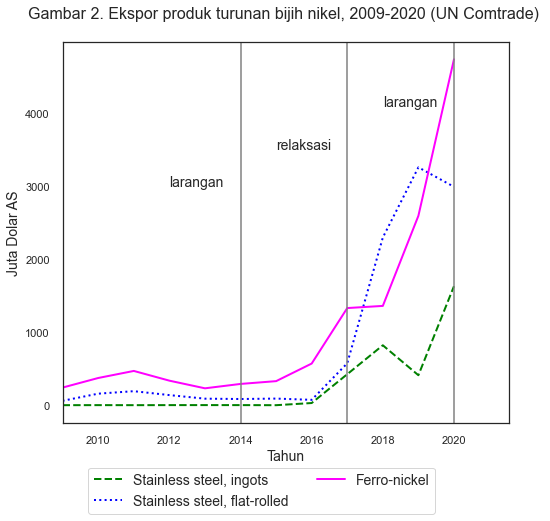

In [37]:
# sns.set_theme(style="white", palette="bright")
plt.ticklabel_format(style='plain', axis='y')
wew['value']=wew['Trade Value (US$)']/1000000
sns.lineplot(data=wew.query('`Commodity Code` == 7218'),x="Year",y="value",color="green",linestyle='dashed',linewidth=2)
sns.lineplot(data=wew.query('`Commodity Code` == 7219'),x="Year",y="value",color="blue",linestyle='dotted',linewidth=2)
sns.lineplot(data=wew.query('`Commodity Code` == 720260'),x="Year",y="value",color="magenta",linewidth=2)
#plt.legend(labels=['7218','7219','ferro-nickel'])
plt.xlim(2009,)
plt.ylabel('Juta Dolar AS',fontsize=14)
plt.xlabel('Tahun',fontsize=14)
plt.title('Gambar 2. Ekspor produk turunan bijih nikel, 2009-2020 (UN Comtrade) \n',fontsize=16)
plt.axvline(x=2014,color='grey')
plt.axvline(x=2017,color='grey')
plt.axvline(x=2020,color='grey')
plt.text(2012,3000,'larangan',fontsize=14)
plt.text(2015,3500,'relaksasi',fontsize=14)
plt.text(2018,4100,'larangan',fontsize=14)
plt.legend(labels=['Stainless steel, ingots','Stainless steel, flat-rolled','Ferro-nickel'],title='',
            bbox_to_anchor=(0.85,-0.1),ncol=2,fontsize=14)

Wow! Keliatan yah bahwa kenaikan ekspor kedua barang tersebut terlihat sangat signifikan setelah 2016. Pada 2020, ekspor ferro-nickel Indonesia mencapai 4,7 miliar Dolar AS, dari hanya 571 juta Dolar AS pada tahun 2016. Stainless steel ingotss naiknya juga signifikan, dari 30 ribu dolar AS jadi 1,6 Miliar Dolar AS. Stainless steel yang kode 7219 juga naiknya gak kira-kira. Dengan kata lain, ekspor ferro-nikel tumbuh sebesar sekitar 8x lipat, sementara 7218 dan 7219 masing-masing tumbuh sebesar 53x dan 40x lipat! Semua ini terjadi hanya dalam jangka waktu 4 tahun! Wow!

In [38]:
wew.query('(Year == 2016 | Year == 2020) & `Commodity Code`>7200')

,Year,Commodity Code,Commodity,Netweight (kg),Trade Value (US$),USD/ton,value
7,2020,720260,Ferro-alloys; ferro-nickel,2874022704,4739112331,1648.947423,4739.112331
11,2020,7218,Stainless steel in ingots or other primary for...,1087854208,1630911693,1499.200611,1630.911693
15,2020,7219,Stainless steel; flat-rolled products of width...,1801937373,2993037641,1661.010913,2993.037641
25,2016,720260,Ferro-alloys; ferro-nickel,411438077,571298623,1388.540961,571.298623
30,2016,7218,Stainless steel in ingots or other primary for...,24614238,30434580,1236.462408,30.434580
35,2016,7219,Stainless steel; flat-rolled products of width...,49912515,74135846,1485.315777,74.135846



## Berkat Ekspor Nikel?

Salah satu hal yang menjadi penunjang kenaikan ekspor stainless steel tersebut adalah, katanya, adalah pelarangan ekspor nikel. Nikel adalah barang mentah. Adalah keinginan Pemerintah Indonesia untuk menghasilkan nilai tambah di dalam negeri. Daripada ekspor nikel mentah lalu negara lain yang menikmati jualan baja, kenapa tidak kita saja yang bikin baja? Berdasarkan logika tersebut, maka dilaranglah ekspor nikel agar penghasil baja Indonesia dapat meningkatkan produksinya dan menghasilkan nilai tambah ekstra di dalam negeri. Secara natural, pertanyaan berikutnya adalah berapakah nilai ekspor nikel yang turun? Apakah sebanding dengan naiknya ekspor baja?

Lagi-lagi untuk menjawabnya, saya menggantungkan diri pada data dari UNCOMTRADE dan juga tebak-tebakan kode HS. Menurut penerawangan saya, Nikel adalah barang yang dikasih kode HS 2604 yaitu *nickel ores and concentrates*. Langsung saja kita coba ilustrasikan dengan grafik. 

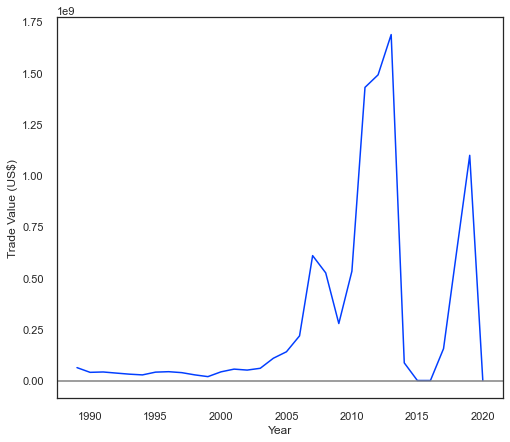

In [39]:
sns.lineplot(data=wew.query('`Commodity Code` == 2604'),x="Year",y="Trade Value (US$)")
plt.axhline(color='grey')

*Trade value* nikel naik secara signifikan sejak commodity boom dimulai sekitar 2005an, dan sempat berkurang saat krisis global 2008. Kemudan, nilai ekspor dari nikel mendadak mendekati nol pada tahun 2014 dan baru naik lagi menjelas 2017-an. Sebenarnya larangan ekspor ini sudah pernah diberlakukan pada tahun 2014, namun pada 2017 dibolehkan lagi. Kita bisa lihat kenaikan kapasitas ekspor yang luar biasa mendekati larangan ekspor tersebut. Sekali lagi ketika dilarang lagi di 2020, para produsen meningkatkan ekspor besar-besaran pada 2019-nya.

Kalau dilihat dari grafik nikel dan stainless steel, sepertinya emang kelihatan ya dampak dari pelarangan ekspor bijih nikel. Ekspor produk turunannya langsung meningkat pesat. Apalagi memang saat ini [sebagian besar nikel dunia](https://nickelinstitute.org/about-nickel-and-its-applications/stainless-steel/) digunakan untuk produksi stainless steel. Apalagi, kenaikan nilai ekspor 3 produk nikel di atas jauh melebihi kehilangan nilai ekspor nikel akibat larangan ekspor. Nilai ekspor bijih nikel saat lagi di puncak paling sekitar 1,7 milyar Dolar AS. angka ini jauh lebih kecil daripada naiknya nilai ekspor tiga produk stainless steel di atas sejak 2016. Dilihat dari data ini, sepertinya memang penambahan nilai tambah di dalam negeri telah berhasil dilakukan.

## Produksi yang berpindah

 Larangan ekspor Indonesia tentunya membuat produsen stainless steel di negara lain kesulitan. Indonesia adalah pemasok bijih nikel terbesar dunia. Tentunya larangan ekspor nikel oleh Indonesia akan memiliki dampak yang besar terhadap pasar global nikel. Mungkin ada 2 cara mainstream menghadapi larangan ekspor nikel Indonesia. Pertama adalah protes baik secara langsung maupun lewat World Trade Organization (WTO), seperti yang [dilakukan oleh Uni Eropa](https://trade.ec.europa.eu/doclib/press/index.cfm?id=2235). Tapi cara ini kurang efektif, pertama selain karena rentan untuk dicuekin, protes ke WTO bisa makan waktu bertahun-tahun. 
 
 Cara kedua adalah dengan memindahkan pabrik ke Indonesia sekalian, beli nikelnya secara domestik, dan mengekspor stainless steelnya balik ke negara masing-masing. Inilah yang [dilakukan oleh Republik Rakyat Tiongkok (RRT)](https://www.woodmac.com/press-releases/tsingshan-indonesia-shakes-up-stainless-steel-markets-in-south-east-asia/). Bahkan Taiwan pun memutuskan untuk mengurangi produksi stainless steel mereka dan membelinya dari Indonesia. 

 Hal ini membuat saya kepingin ngelihat peta ekspor stainless steel dunia, yang lagi-lagi bisa kita dapat dari UNCOMTRADE. Saya akan coba lihat beberapa negara yang katanya big player di stainless steel. Saya coba masukin Amerika Serikat, Inggris, Uni Eropa (termasuk inggris wkkw), Indonesia, China, India dan Swedia. Saya cuma pake stainless steel yang 7218 yak karena ini yang jadi pemantik di twit di atas.

In [40]:
waks=pd.read_csv('stainlesssteel2.csv').sort_values(by=['Year','Trade Value (US$)'])
pd.set_option('display.max_rows', None)
b=[]
ctr=('IDN','GBR','EU2','CHN','IND','SWE')
for i in ctr:
    bmii=waks.loc[(waks['Reporter ISO'] == i)]
    b.append(bmii)
b=pd.concat(b)
b.query('Year == 2020')

,Year,Reporter,Reporter ISO,Commodity Code,Commodity,Netweight (kg),Trade Value (US$)
642,2020,Indonesia,IDN,7218,Stainless steel in ingots or other primary for...,1.087854e+09,1630911693
897,2020,United Kingdom,GBR,7218,Stainless steel in ingots or other primary for...,1.408406e+08,326187431
3,2020,EU-28,EU2,7218,Stainless steel in ingots or other primary for...,4.993958e+07,179001341
550,2020,China,CHN,7218,Stainless steel in ingots or other primary for...,2.600670e+05,1247579
819,2020,India,IND,7218,Stainless steel in ingots or other primary for...,6.883925e+06,14563591
857,2020,Sweden,SWE,7218,Stainless steel in ingots or other primary for...,4.217050e+07,147560969


<AxesSubplot:xlabel='Year', ylabel='Netweight (kg)'>

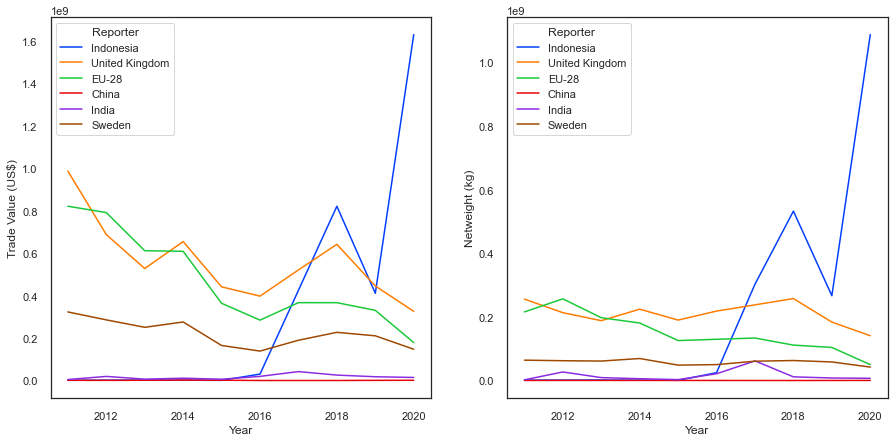

In [41]:
fig, ax =plt.subplots(1,2,figsize=(15,7))
sns.lineplot(data=b,x="Year",y="Trade Value (US$)",hue="Reporter", ax=ax[0])
sns.lineplot(data=b,x="Year",y="Netweight (kg)",hue="Reporter", ax=ax[1])

Gambar di atas, sebelah kiri adalah dalam Dolar Amerika sementara sebelah kanan dalam kilogram. Nilai ekspor ngedrop pada 2016 kayaknya gara-gara Presiden AS memberlakukan tariff terhadap baja. Tapi sekotar 2017 Uni Eropa berhasil nego dikit. Tapi jelas kelihatan bahwa seiring kenaikan ekspor Indonesia, ekspor negara lain menurun, terutama negara-negara barat. India dan RRT merupakan produsen, namun mereka menggunakan sebagian besar produknya untuk kepentingan domestik sehingga ekspornya kurang banyak. Bahkan, hampir semua ferro-nickel Indonesia sebenernya buat dipake di RRT.

Text(0.5, 0, 'Nilai Ekspor (Juta USD)')

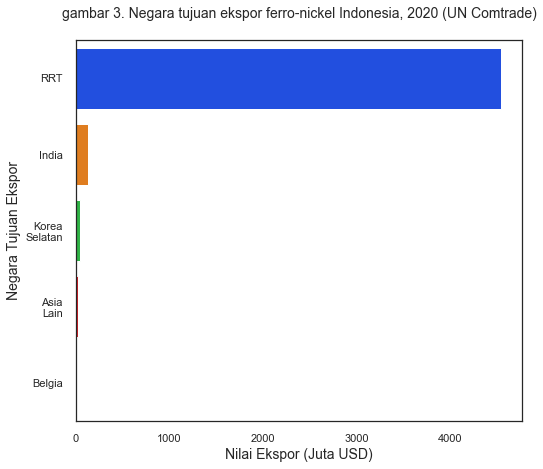

In [47]:
ax=sns.barplot(data=pd.read_csv('ferronickel.csv'),x="Nilai Ekspor (Juta USD)",y="Tujuan Ekspor")
ax.set_yticklabels(["RRT","India","Korea\nSelatan","Asia\nLain","Belgia"])
plt.title("gambar 3. Negara tujuan ekspor ferro-nickel Indonesia, 2020 (UN Comtrade)\n",size=14)
plt.ylabel("Negara Tujuan Ekspor",size=14)
plt.xlabel("Nilai Ekspor (Juta USD)",size=14)

Kalo RRT wajar sih, karena memang perusahaan China lah yang pindah ke Indonesia. Jadi sebenernya produsennya dia lagi dia lagi tapi pindah lokasi aja ke Indonesia. India dan Uni Eropa sama-sama lagi mengatur strategi bagaimana mengurangi impor dari Indonesia, sementara Taiwan memilih untuk mengikuti arus dan beli aja dari Indonesia daripada proteksi. Sementara itu, Produsen di Korea Selatan memilih untuk mengubah jenis baja yang mereka produksi, mengurangi stainless steel grade rendah dan meningkatkan produksi stainless steel yang lebih tinggi.

Kalau lihat strateginya korsel, berarti sepertinya stainless steel sendiri memiliki banyak grade meski ada di HS-Code yang sama. Berhubung saya sendiri bukan pemerhati nikel dan stainless steel yang berdedikasi, saya ga punya cukup info untuk menggali hal ini. Tapi kita dapat kira-kira kualitas stainless steelnya dari harga. Kita asumsikan aja kalo harganya mahal berarti stainless steelnya lebih bagus. BTW Korsel ga saya masukin karena produksi mereka juga kebanyakan dipakai sendiri jadi ekspornya dikit.

Harga juga kayaknya macem-macem ya, tapi kita proksi aja pakai $\frac{\text{Nilai Ekspor}}{\text{Berat}}$

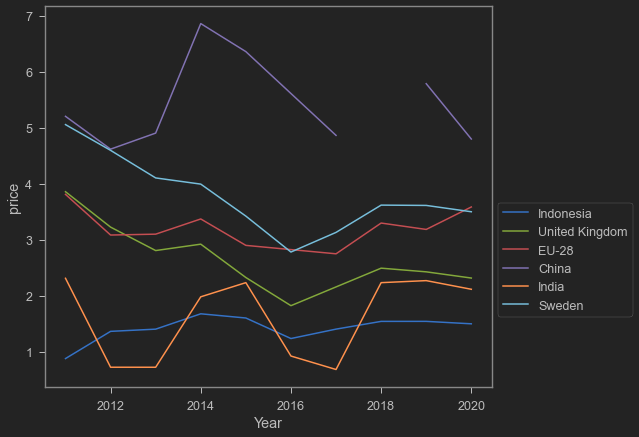

In [106]:
b['price']=b['Trade Value (US$)']/b['Netweight (kg)']
sns.lineplot(data=b,x="Year",y="price",hue="Reporter")
plt.legend(bbox_to_anchor=(1,0.5))

Daaan memang Stainless Steel Indonesia bisa dibilang yang paling murah diantara negara-negara di atas. Tentunya kita harus berhati-hati menggunakan harga ini ya. Kalau produknya sama, berarti Indonesia justru hebat karena bisa produksi dengan harga miring. Tapi wajar sih ya yang lain kan harus akses Nikel yang harga internasionalnya mahal, sementara produsen di Indonesia pakai produk sendiri yang ekspornya dilarang, jadi harga bahan baku bisa ditekan. Di samping itu, bisa saja di negara yang lebih maju, *concern* tentang emisi mengakibatkan biaya produksi yang lebih tinggi daripada negara yang tidak terlalu mengutamakan isu lingkungan.

Yaudah sih sekian dulu postingan hari ini. Masih banyak info yang perlu digali, tapi bisa jadi ini adalah contoh sukses penggunaan larangan ekspor untuk menarik investasi asing dan tenaga kerja untuk meningkatkan nilai tambah di dalam negeri. Gimana menurut anda? Apakah ini adalah hal yang baik? Mensen saya di [@twitter](https://twitter.com/imedkrisna) ya buat berdiskusi!

